In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Вывод функции в общем виде
$$
f_0(x) = \dfrac 1 2 (x^TAx) + b^Tx \quad A-неопределенная~невыражденная~матрица
$$
$$
f_0(x) = \dfrac 1 2 \left( \sum\limits_{j=1}^{3}\left( x_j\sum\limits_{i=1}^{3}a_{ij}x_i\right) \right) + \sum\limits_{i=1}^{3}b_ix_i
$$


In [46]:
A = np.array([[ 1, 0,  0],
              [ 0,  1,  0],
              [ 2, 0,  1]])

b = np.array([0, 1, 0])

In [47]:
np.linalg.det(A)

np.float64(1.0)

$$
A= \begin{pmatrix}
{1} && {2} && {0} \\ 
{0} && {1} && {0} \\ 
{0} && {0} && {1}
\end{pmatrix}
$$

$$
b = \begin{pmatrix}{0}\\ {1}\\ {0}\end{pmatrix}
$$

$$
f_0(x_1, x_2, x_2) = 
\dfrac 1 2 \left(
    x_1^2 + x_2^2 +x_3^2 + 2x_1x_2
\right) + x_2
$$

$$
g(x)=\| x-x_0 \| - r = 0 \iff \| x - x_0 \| ^2 - r^2 = 0
$$

In [48]:
def f(x1, x2, x3):
    return (x1 ** 2 + x2 ** 2 + x3 ** 2 + 2 * x1 * x2) / 2 + x2

$$
F(x)=f(x) + \lambda g(x)
$$

$$
L(\lambda, x)=\dfrac 1 2 \left(
    x_1^2 + x_2^2 +x_3^2 + 2x_1x_2
\right) + x_2 + \lambda((x_1-p_1)^2 + (x_2-p_2)^2 + (x_3-p_3)^2 - r^2)
$$

In [49]:
def L(v):
    lambda_val, x1, x2, x3 = v
    global x0, r
    return ((x1 ** 2 + x2 ** 2 + x3 ** 2 + 2 * x1 * x2) / 2 + x2
            + lambda_val * ((x1 - x0[0]) ** 2 + (x2 - x0[1]) ** 2 + (x2 - x0[1]) ** 2 - r ** 2))

$$
\nabla L = \begin{cases}
{(x_1-p_1)^2 + (x_2-p_2)^2 + (x_3-p_3)^2 - r^2} \\
{x_1+x_2+2\lambda (x_1-p_1)} \\
{x_2+x_1+1+2\lambda (x_2-p_2)} \\
{x_3+2\lambda (x_3-p_3)} 
\end{cases}
$$

In [50]:
x0, r = (0, 0, 0), 1

In [51]:
def grad_L(v):
    lambda_val, x1, x2, x3 = v
    global x0, r
    return np.array([
        (x1 - x0[0]) ** 2 + (x2 - x0[1]) ** 2 + (x2 - x0[1]) ** 2 - r ** 2,
        (2 * x1 - 2 * x2 + x3) / 2 + 1 + 2 * lambda_val * (x1 - x0[0]),
        (-2 * x1 + 4 * x2 - x3) / 2 + 2 + 2 * lambda_val * (x2 - x0[1]),
        (x1 - x2 + 4 * x3) / 2 - 1 + 2 * lambda_val * (x3 - x0[2])
    ])

$$\begin{cases}
{x_1^2 + x_2^2 + x_3^2 - 1=0} \\
{x_1+x_2+2\lambda x_1=0} \\
{x_2+x_1+1+2\lambda x_2=0} \\
{x_3+2\lambda x_3=0} 
\end{cases}$$

$$\left\{\begin{gathered}k=-\dfrac{1}{2}\\x_{2}=0\\x_{1}=-1\\x_{3}=0\end{gathered}\right.,\,\;\left\{\begin{gathered}x_{3}=0\\x_{1}=\dfrac{1}{2}\\x_{2}=-\dfrac{\sqrt{3}}{2}\\k=\dfrac{\sqrt{3}-1}{2}\end{gathered}\right.,\,\;\left\{\begin{gathered}x_{3}=0\\x_{1}=\dfrac{1}{2}\\x_{2}=\dfrac{\sqrt{3}}{2}\\k=\dfrac{-\sqrt{3}-1}{2}\end{gathered}\right.$$

$$
H(\lambda, x) = \begin{pmatrix}
    {0} && {2x_1} && {2x_2} && {2x_3} \\
    {2x_1} && {1+2\lambda} && {1} && {0} \\
    {2x_2} && {1} && {1+2\lambda} && {0} \\
    {2x_3} && {0} && {0} && {1+2\lambda} 
\end{pmatrix}
$$

In [52]:
def H_F(v):
    lambda_val, x1, x2, x3 = v
    global x0
    return np.array([
        [
            0, 2 * (x1 - x0[0]), 2 * (x2 - x0[1]), 2 * (x3 - x0[2]) 
        ], 
        [   
            2 * (x1 - x0[0]), 2 * lambda_val, 3 / 2, 0
        ], 
        [   
            2 * (x2 - x0[1]), 3 / 2, 2 * lambda_val, 0
        ], 
        [
            2 * (x3 - x0[2]), 0, 0, -1 + 2 * lambda_val
        ]
    ])

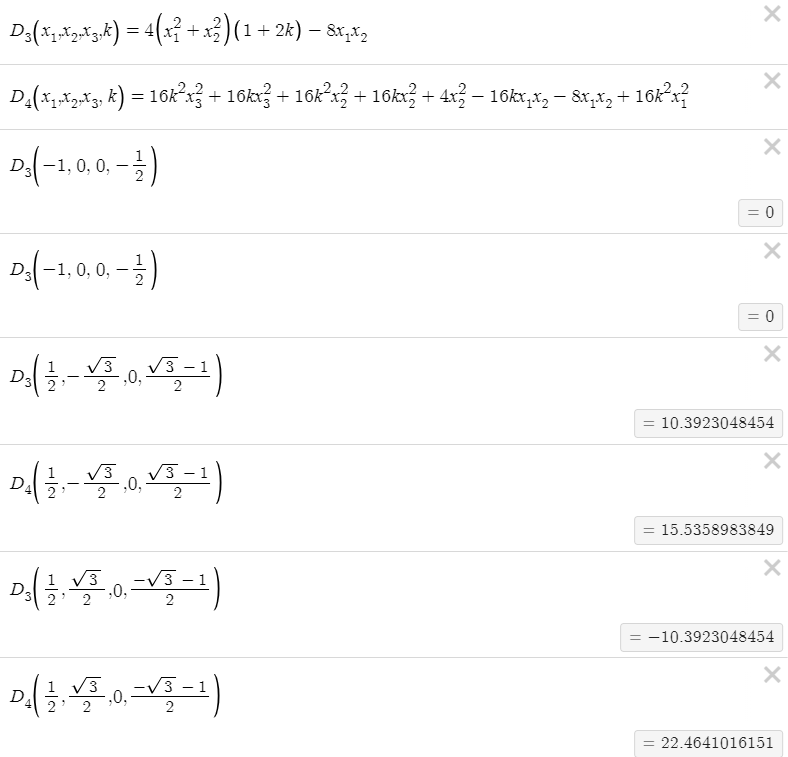

$$v_{min}=(\lambda, x_1, x_2, x_3)=(0.37, 0.5, -0.87, 0)$$

In [53]:
exact_x = np.array([0.5, -0.87, 0])

In [54]:
f(*exact_x)

np.float64(-0.80155)

$$
f_0(x_1, x_2, x_2) = 
\dfrac 1 2 \left(
    x_1^2 + x_2^2 +x_3^2 + 2x_1x_2
\right) + x_2
$$
$$x_3^2=1-x_2^2-x_1^2$$
$$h(x_1, x_2)=(x_1+1)x_2$$
$$g_h(x_1, x_2)=x_1^2+x_2^1-1$$
$$L_h(x_1, x_2, \lambda)=(x_1+1)x_2+\lambda (x_2^2+x_1^2-1)$$

In [55]:
def ГрадиентныйСпуск(func, grad_func, v0, h, epsilon):
    index = 0
    v = v0

    indexes, vectors, steps, func_vals, norms = [], [], [], [], []
    
    while True:
        indexes.append(index)
        steps.append(h)

        vectors.append(np.round(v, 2))

        f_val = func(v)
        func_vals.append(f_val)

        grad = grad_func(v)

        norms.append(np.linalg.norm(grad))

        v = v - h * grad

        # l = np.sqrt(np.sum([v[i] * v[i] for i in range(1, len(v))]))
        # for i in range(1, len(v)):
        #     v[i] = v[i] / l

        if f_val <= func(v):
            h = h / 2
        
        index += 1

        if np.linalg.norm(grad) < epsilon:
            break

        if index > 1000:
            break

    return pd.DataFrame({'vec': vectors, 'h': steps, 
                         'f': func_vals, '||∇F||': norms}, index=indexes), index - 1, v

In [56]:
def ПокординатныйСпуск(func, grad_func, v0, h0, epsilon):
    index = 0
    v = v0

    indexes, vectors, steps, func_vals, norms = [], [], [], [], []
    
    for i in range(len(v)):

        h = h0

        while True:
            indexes.append(index)
            steps.append(h)

            vectors.append(np.round(v, 2))

            f_val = func(v)
            func_vals.append(f_val)

            grad = grad_func(v)

            norms.append(np.abs(grad[i]))

            v[i] = v[i] - h * grad[i]

            if f_val <= func(v):
                h = h / 2
            
            index += 1

            if np.abs(grad[i]) < epsilon:
                break

            if index > 1000:
                break

    return pd.DataFrame({'vec': vectors, 'h': steps, 
                         'f': func_vals, '|F\'|': norms}, index=indexes), index - 1, v

In [57]:
epsilon = 0.01
v0 = [0.5, 0, -1, 0]
h = 10

In [58]:
df, index, vec = ГрадиентныйСпуск(L, grad_L, v0, h, epsilon)
print(f'Сошлось за {index} итераций')
print(f'Численное решение: {vec}')
print(f'Аналитическое решение: {exact_x}')
# print(f'Норма разницы численного и точного решения = {np.linalg.norm(vec - exact_x)}')
df

Сошлось за 1000 итераций
Численное решение: [nan nan nan nan]
Аналитическое решение: [ 0.5  -0.87  0.  ]


C:\Users\User\AppData\Local\Temp\ipykernel_27264\2433317317.py:4: RuntimeWarning: overflow encountered in scalar power
  return ((x1 ** 2 + x2 ** 2 + x3 ** 2 + 2 * x1 * x2) / 2 + x2
C:\Users\User\AppData\Local\Temp\ipykernel_27264\2433317317.py:4: RuntimeWarning: overflow encountered in scalar multiply
  return ((x1 ** 2 + x2 ** 2 + x3 ** 2 + 2 * x1 * x2) / 2 + x2
C:\Users\User\AppData\Local\Temp\ipykernel_27264\2433317317.py:4: RuntimeWarning: invalid value encountered in scalar add
  return ((x1 ** 2 + x2 ** 2 + x3 ** 2 + 2 * x1 * x2) / 2 + x2
C:\Users\User\AppData\Local\Temp\ipykernel_27264\2433317317.py:5: RuntimeWarning: overflow encountered in scalar power
  + lambda_val * ((x1 - x0[0]) ** 2 + (x2 - x0[1]) ** 2 + (x2 - x0[1]) ** 2 - r ** 2))
C:\Users\User\AppData\Local\Temp\ipykernel_27264\1316654386.py:6: RuntimeWarning: overflow encountered in scalar multiply
  (2 * x1 - 2 * x2 + x3) / 2 + 1 + 2 * lambda_val * (x1 - x0[0]),
C:\Users\User\AppData\Local\Temp\ipykernel_27264\28079

,vec,h,f,||∇F||
0,"[0.5, 0.0, -1.0, 0.0]",10,0.000000e+00,2.500000e+00
1,"[-9.5, -20.0, 9.0, 5.0]",10,-5.247500e+03,6.843345e+02
2,"[-5619.5, -3565.0, 1344.0, 1010.0]",10,-9.171792e+10,4.720462e+07
3,"[-163224579.5, -400629885.0, 150996004.0, 1135...",10,-3.364122e+25,2.517671e+17
4,"[-2.061038912193717e+18, -1.3078528857371343e+...",10,-4.526927e+54,6.352161e+36
...,...,...,...,...
996,"[nan, nan, nan, nan]",10,NaN,NaN
997,"[nan, nan, nan, nan]",10,NaN,NaN
998,"[nan, nan, nan, nan]",10,NaN,NaN
999,"[nan, nan, nan, nan]",10,NaN,NaN


In [59]:
df, index, vec = ПокординатныйСпуск(L, grad_L, v0, h, epsilon)
print(f'Сошлось за {index} итераций')
print(f'Численное решение: {vec}')
print(f'Аналитическое решение: {exact_x}')
# print(f'Норма разницы численного и точного решения = {np.linalg.norm(vec - exact_x)}')
df

Сошлось за 1003 итераций
Численное решение: [np.float64(-10009.5), np.float64(-20.0), np.float64(-200391.0), np.float64(-1001845.0)]
Аналитическое решение: [ 0.5  -0.87  0.  ]


,vec,h,f,|F'|
0,"[0.5, 0.0, -1.0, 0.0]",10,0.000000e+00,1.0
1,"[-9.5, 0.0, -1.0, 0.0]",10,-1.000000e+01,1.0
2,"[-19.5, 0.0, -1.0, 0.0]",10,-2.000000e+01,1.0
3,"[-29.5, 0.0, -1.0, 0.0]",10,-3.000000e+01,1.0
4,"[-39.5, 0.0, -1.0, 0.0]",10,-4.000000e+01,1.0
...,...,...,...,...
999,"[-9989.5, 0.0, -1.0, 0.0]",10,-9.990000e+03,1.0
1000,"[-9999.5, 0.0, -1.0, 0.0]",10,-1.000000e+04,1.0
1001,"[-10009.5, 0.0, -1.0, 0.0]",10,-1.001000e+04,2.0
1002,"[-10009.5, -20.0, -1.0, 0.0]",10,-4.013590e+06,20039.0
